In [201]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [202]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv('gender_submission.csv')

In [203]:
data = train.append(test)
data.reset_index(inplace=True, drop=True)

In [204]:
data['Family_Size'] = data['Parch'] + data['SibSp']

In [205]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]
#data['Title2'] = data['Title1'] \
#.replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
#         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [206]:

data["Title2"]=data["Title1"].replace(['Mr','Don'],'Mr')
data["Title2"]=data["Title1"].replace(['Mrs','Miss','Mme','Ms','Lady','Dona','Mlle'],'Ms')
data["Title2"]=data["Title1"].replace(['Sir','Major','Col','Capt'],'Major')
data["Title2"]=data["Title1"].replace(['Master','Jonkheer','the Countess'],'Jonkheer')
#data["Title2"]=data["Title1"].replace(['Rev','Dr'],'Rev')


In [207]:
data['Ticket_info'] = \
data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [208]:
data['Embarked'] = data['Embarked'].fillna('S')

In [209]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [210]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else None )
data[data['Cabin'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,None,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr,A5
2,26.0,None,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss,STONO2
4,35.0,None,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr,X
5,NaN,None,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0,Mr,Mr,X
7,2.0,None,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,4,Master,Jonkheer,X
8,27.0,None,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2,Mrs,Mrs,X
9,14.0,None,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,1,Mrs,Mrs,X
12,20.0,None,S,8.0500,"Saundercock, Mr. William Henry",0,13,3,male,0,0.0,A/5. 2151,0,Mr,Mr,A5
13,39.0,None,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,male,1,0.0,347082,6,Mr,Mr,X
14,14.0,None,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,0.0,350406,0,Miss,Miss,X


In [211]:
# Label Encoding : http://pbpython.com/categorical-encoding.html
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

#data[data['Cabin'].notnull()]['Cabin'] = (data[data['Cabin'].notnull()]['Cabin']).astype('category').cat.codes
print (data['Cabin'].unique())
data['Cabin'].replace(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [0,1,2,3,4,5,6,7], inplace=True)

#pd.get_dummies(data[data['Cabin'].notnull()]['Cabin'])

[None 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [212]:
dataCabinNull = data[data["Cabin"].isnull()]
dataCabinNotNull = data[data["Cabin"].notnull()]
print(data.describe())

'''
remove_outlier = \
dataCabinNotNull[~((np.abs(dataCabinNotNull["Fare"]-dataCabinNotNull["Fare"].mean())>(4*dataCabinNotNull["Fare"].std()))|
(np.abs(dataCabinNotNull["Ticket_info"]-dataCabinNotNull["Ticket_info"].mean())>(4*dataCabinNotNull["Ticket_info"].std())))]
'''

''' not good
rfModel_Cabin = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 
'''
rfModel_Cabin = RandomForestRegressor(n_estimators=2000,random_state=42)
CabinColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info']
rfModel_Cabin.fit(dataCabinNotNull[CabinColumns], dataCabinNotNull["Cabin"])


CabinNullValues = rfModel_Cabin.predict(X= dataCabinNull[CabinColumns])
dataCabinNull.loc[:,"Cabin"] = CabinNullValues
data = dataCabinNull.append(dataCabinNotNull)
data.reset_index(inplace=True, drop=True)

               Age       Cabin     Embarked         Fare        Parch  \
count  1046.000000  295.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    2.491525     1.493506    33.295479     0.385027   
std      14.413493    2.202139     0.814244    51.738879     0.865560   
min       0.170000    0.000000     0.000000     0.000000     0.000000   
25%      21.000000    0.000000     1.000000     7.895800     0.000000   
50%      28.000000    3.000000     2.000000    14.454200     0.000000   
75%      39.000000    5.000000     2.000000    31.275000     0.000000   
max      80.000000    7.000000     2.000000   512.329200     9.000000   

       PassengerId       Pclass          Sex        SibSp    Survived  \
count  1309.000000  1309.000000  1309.000000  1309.000000  891.000000   
mean    655.000000     1.294882     0.644003     0.498854    0.383838   
std     378.020061     0.837836     0.478997     1.041658    0.486592   
min       1.000000     0.000000     0.000000     0

In [213]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
#print(data.describe())

remove_outlier = \
dataAgeNotNull[~((np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
(np.abs(dataAgeNotNull["Ticket_info"]-dataAgeNotNull["Ticket_info"].mean())>(4*dataAgeNotNull["Ticket_info"].std())))]


'''
rfModel_age = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
lab_enc = preprocessing.LabelEncoder()
remove_outlier["Age"] = lab_enc.fit_transform(remove_outlier["Age"])
print(remove_outlier["Age"])
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])
'''

rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [214]:
dataTrain = data[data['Survived'].notnull()].sort_values(by=["PassengerId"])
dataTest = data[data['Survived'].isnull()].sort_values(by=["PassengerId"])

In [215]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
import operator
 
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=(1500),
                             min_samples_split=12,
                             min_samples_leaf=1,
                             random_state=1,
                             n_jobs=-1) 

knn = KNeighborsClassifier(n_neighbors = 9)
logreg = LogisticRegression()

num_algo = 3

In [217]:
rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
rf_res =  rf.predict(dataTest)
rf_res

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [218]:
knn.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
knn_res =  knn.predict(dataTest)

In [219]:
logreg.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
logreg_res =  logreg.predict(dataTest)

In [220]:
#####################################################
#                  major vote                       #
#####################################################
sub_res = []
for i in range(rf_res.size):
    major_vote = 0
    
    if rf_res[i]:
        major_vote += 1
    if knn_res[i]:
        major_vote += 1
    if logreg_res[i]:
        major_vote += 1
        
    if  major_vote > (num_algo/2):
        sub_res = np.append(sub_res, 1)
    else:
        sub_res = np.append(sub_res, 0)
        
sub_res

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [223]:
submit['Survived'] = sub_res        
print(submit)
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

     PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       0.0
3            895       0.0
4            896       1.0
5            897       0.0
6            898       0.0
7            899       0.0
8            900       1.0
9            901       0.0
10           902       0.0
11           903       0.0
12           904       1.0
13           905       0.0
14           906       1.0
15           907       1.0
16           908       0.0
17           909       0.0
18           910       0.0
19           911       1.0
20           912       0.0
21           913       1.0
22           914       1.0
23           915       1.0
24           916       1.0
25           917       0.0
26           918       1.0
27           919       0.0
28           920       0.0
29           921       0.0
..           ...       ...
388         1280       0.0
389         1281       0.0
390         1282       1.0
391         1283       1.0
392         1284       1.0
3

In [17]:
#tune parameter of rf knn

In [18]:
#major vote

In [150]:
def train_pred_precision(classifier, i, dict_score, dict_predict, file):

    scores = cross_val_score(classifier, dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0], cv=10)
    #print (scores.mean())
    file.write(str(scores.mean()) + '\n')
    dict_score[i] = scores.mean()
    
    predicted = cross_val_predict(classifier, dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0], cv=10)
    predict_res = metrics.accuracy_score(dataTrain.iloc[:, 0], predicted)
    #print (metrics.accuracy_score(dataTrain.iloc[:, 0], predicted))
    file.write(str(predict_res) + '\n')
    dict_predict[i] = predict_res
    
    #print (results)
    

In [125]:
def tune_rf_n_estimators():
    file = open('tune_rf_n_estimators.txt', 'a') 
    #results = np.array([0, 0])
    dict_score = {}
    dict_predict = {}
    
    for i in range(31):
        if i == 0:
            continue
        else:
            print (i)
            rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=(i*100),
                             min_samples_split=12,
                             min_samples_leaf=1,
                             random_state=1,
                             n_jobs=-1) 
            file.write('=============================================== \n')
            file.write('n_estimators= ' + str(i*100) + '\n')
            train_pred_precision(rf, i, dict_score, dict_predict, file)
            
    ######  summary  ######
    file.write('===================================================== \n')
    file.write('=                   summary                         = \n')
    file.write('===================================================== \n')
    #print (dict_score)
    #print (dict_predict)
    sorted_dict_score = sorted(dict_score.items(), key=operator.itemgetter(1))     #sort by value
    sorted_dict_predict = sorted(dict_predict.items(), key=operator.itemgetter(1))
    file.write(str(sorted_dict_score) + '\n')
    file.write(str(sorted_dict_predict) + '\n')
    #print (sorted_dict_score)
    #print (sorted_dict_predict)

In [67]:

def tune_knn_n_neighbors():
    file = open('tune_knn_n_neighbors.txt', 'a')
    #results = np.array([0, 0])
    dict_score = {}
    dict_predict = {}
    
    for i in range(21):
        if i == 0:
            continue
        else:
            print (i)
            knn = KNeighborsClassifier(n_neighbors = i)
            file.write('=============================================== \n')
            file.write('n_neighbors= ' + str(i) + '\n')
            train_pred_precision(knn, i, dict_score, dict_predict, file)
    
    
    ######  summary  ######
    file.write('===================================================== \n')
    file.write('=                   summary                         = \n')
    file.write('===================================================== \n')
    sorted_dict_score = sorted(dict_score.items(), key=operator.itemgetter(1))
    sorted_dict_predict = sorted(dict_predict.items(), key=operator.itemgetter(1))
    file.write(str(sorted_dict_score) + '\n')
    file.write(str(sorted_dict_predict) + '\n')
    

In [157]:
def tune_rf_min_samples_split():
    file = open('tune_rf_min_samples_split.txt', 'a') 
    #results = np.array([0, 0])
    dict_score = {}
    dict_predict = {}
    
    for i in range(2, 21):
        if i == 0:
            continue
        else:
            print (i)
            rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1500,
                             min_samples_split=(i),
                             min_samples_leaf=1,
                             random_state=1,
                             n_jobs=-1) 
            file.write('=============================================== \n')
            file.write('min_samples_split= ' + str(i) + '\n')
            train_pred_precision(rf, i, dict_score, dict_predict, file)
            
    ######  summary  ######
    file.write('===================================================== \n')
    file.write('=                   summary                         = \n')
    file.write('===================================================== \n')
    sorted_dict_score = sorted(dict_score.items(), key=operator.itemgetter(1))     #sort by value
    sorted_dict_predict = sorted(dict_predict.items(), key=operator.itemgetter(1))
    file.write(str(sorted_dict_score) + '\n')
    file.write(str(sorted_dict_predict) + '\n')


In [161]:
def tune_rf_min_samples_leaf():
    file = open('tune_rf_min_samples_leaf.txt', 'a') 
    #results = np.array([0, 0])
    dict_score = {}
    dict_predict = {}
    
    for i in range(1, 11):
        if i == 0:
            continue
        else:
            print (i)
            rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1500,
                             min_samples_split=12,
                             min_samples_leaf=i,
                             random_state=1,
                             n_jobs=-1) 
            file.write('=============================================== \n')
            file.write('min_samples_leaf= ' + str(i) + '\n')
            train_pred_precision(rf, i, dict_score, dict_predict, file)
            
    ######  summary  ######
    file.write('===================================================== \n')
    file.write('=                   summary                         = \n')
    file.write('===================================================== \n')
    sorted_dict_score = sorted(dict_score.items(), key=operator.itemgetter(1))     #sort by value
    sorted_dict_predict = sorted(dict_predict.items(), key=operator.itemgetter(1))
    file.write(str(sorted_dict_score) + '\n')
    file.write(str(sorted_dict_predict) + '\n')

In [162]:
tune_rf_min_samples_leaf()

1
2
3
4
5
6
7
8
9
10


In [158]:
tune_rf_min_samples_split()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [126]:
tune_rf_n_estimators()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
tune_knn_n_neighbors()

In [85]:
####################################################
#                    draw                          #
####################################################
def draw_pre_plot(plot_para, _range):

    #need sort by x
    plot_para = sorted(plot_para)

    list_x = []
    list_y = []
    for i in range(0, _range):
        list_x.append(plot_para[i][0]) 
        list_y.append(plot_para[i][1])

    print (list_x)
    print (list_y)

    plt.plot(list_x, list_y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.8181855067529226, 0.8170743956418114, 0.8193091022585405, 0.8204451821586654, 0.819321870389286, 0.8204454658949041, 0.8204454658949041, 0.8204454658949041, 0.8193091022585405, 0.8170619112473044, 0.8170619112473044, 0.8170619112473044, 0.8170619112473044, 0.8170619112473044, 0.8193091022585405, 0.8193091022585405, 0.8193091022585405, 0.8193091022585405, 0.819334354783793, 0.821569061400522, 0.821569061400522, 0.8226926569061401, 0.8226926569061401, 0.8215815457950291, 0.8226926569061401, 0.823816252411758, 0.823816252411758, 0.8226926569061401, 0.8226926569061401, 0.8226926569061401]


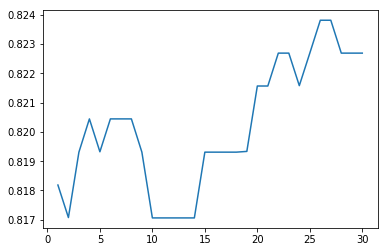

In [86]:
plot_rf = [(21, 0.82156906140052199), (24, 0.82158154579502907), (22, 0.82269265690614013), (23, 0.82269265690614013), 
    (25, 0.82269265690614013), (28, 0.82269265690614013), (29, 0.82269265690614013), (30, 0.82269265690614013), 
    (26, 0.82381625241175804), (27, 0.82381625241175804), (10, 0.81706191124730443), (11, 0.81706191124730443), 
    (12, 0.81706191124730443), (13, 0.81706191124730443), (14, 0.81706191124730443), (2, 0.81707439564181139), 
    (1, 0.81818550675292256), (3, 0.81930910225854048), (9, 0.81930910225854048), (15, 0.81930910225854048), 
    (16, 0.81930910225854048), (17, 0.81930910225854048), (18, 0.81930910225854048), (5, 0.81932187038928606), 
    (19, 0.81933435478379302), (4, 0.82044518215866535), (6, 0.82044546589490408), (7, 0.82044546589490408), 
    (8, 0.82044546589490408), (20, 0.82156906140052199)]

draw_pre_plot(plot_rf, 30)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.6870355237770968, 0.6823890591306321, 0.7027031551469753, 0.6925144705481785, 0.7150377369197594, 0.7071342639881965, 0.722890988537056, 0.7252006015208262, 0.7308685166269437, 0.7229783792986041, 0.7229911474293497, 0.7274480762683009, 0.7240648053569402, 0.7218925207127456, 0.7196450459652707, 0.7196197934400181, 0.7140140165701965, 0.7173598342980366, 0.7196447622290318, 0.7084340596981047]


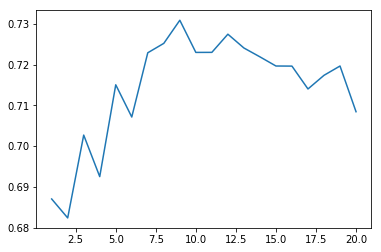

In [87]:
plot_knn = [(2, 0.68238905913063208), (1, 0.68703552377709676), (4, 0.6925144705481785), 
            (3, 0.70270315514697534), (6, 0.70713426398819645), (20, 0.70843405969810469), 
            (17, 0.71401401657019647), (5, 0.71503773691975936), (18, 0.71735983429803662), 
            (16, 0.71961979344001814), (19, 0.71964476222903184), (15, 0.71964504596527068), 
            (14, 0.72189252071274557), (7, 0.72289098853705602), (10, 0.72297837929860409), 
            (11, 0.72299114742934967), (13, 0.72406480535694018), 
            (8, 0.72520060152082622), (12, 0.72744807626830088), (9, 0.73086851662694374)]

draw_pre_plot(plot_knn, 20)

In [177]:
num_algo = 3
num_algo/2

1.5